## Task: Predict weekly sales of a walmart store using linear regression

You are provided with a dataset about Walmart's sales in a CSV file.

This is the historical data that covers sales from 2010-02-05 to 2012-11-01, in the file Walmart_Store_sales. Within this file you will find the following fields:

1. Store - the store number
2. Date - the week of sales
3. Weekly_Sales - sales for the given store
4. Holiday_Flag - whether the week is a special holiday week: 1 – Holiday week 0 – Non-holiday week
5. Temperature - Temperature on the day of sale
6. Fuel_Price - Cost of fuel in the region
7. CPI – Prevailing consumer price index
8. Unemployment - Prevailing unemployment rate

Note:

You might find it helpful to include information about the kind of holiday week it is. This is something you'll need to add through data processing.
You can use this information about the holiday weeks.

Holiday Events:
1. Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
2. Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
3. Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
4. Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

### Tasks:
- Preprocess the data:
    - Remove any column which might not be useful
    - Add holiday type information
    - Normalize the data
- Split the data randomly into training and testing sets (80:20 split)
- Build and train a linear regression model. You can use any framerwork for this (numpy, sklearn or pytorch)
- Evaluate the trained model on test data. Report Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE).
- Visualize model performance using graphs.

In [ ]:
from IPython.display import clear_output

In [ ]:
# Incase you run this notebook outside colab (where the libraries aren't already pre-installed)

%pip install gdown==4.5
%pip install pandas
%pip install numpy

clear_output()

In [1]:
# Download the CSV file.
!gdown 1UjuHkxE8VSQOdklibKqZ72qodJLBynEv

Downloading...
From: https://drive.google.com/uc?id=1UjuHkxE8VSQOdklibKqZ72qodJLBynEv
To: /content/Walmart.csv
100% 364k/364k [00:00<00:00, 4.42MB/s]


In [2]:
import pandas as pd
import numpy as np

In [3]:
data_df = pd.read_csv('Walmart.csv')

In [4]:
data_df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [5]:
data_y = data_df['Weekly_Sales'] # target
data_x = data_df.drop(['Weekly_Sales'], axis=1) # input features

In [6]:
data_x.head()

,Store,Date,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,0,46.50,2.625,211.350143,8.106


In [7]:
data_y

0       1643690.90
1       1641957.44
2       1611968.17
3       1409727.59
4       1554806.68
           ...    
6430     713173.95
6431     733455.07
6432     734464.36
6433     718125.53
6434     760281.43
Name: Weekly_Sales, Length: 6435, dtype: float64

In [10]:
desc = data_x.describe()
desc

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,1.000000,100.140000,4.468000,227.232807,14.313000


In [13]:
x = data_x[["Store", "Holiday_Flag", "Temperature", "Fuel_Price", "CPI", "Unemployment"]].apply(lambda x: (x-x.min())/(x.max()-x.min())).to_numpy()

In [18]:
y=data_y.to_numpy()
y_max = np.max(y)
y_min = np.min(y)
y = (y-y_min)/(y_max-y_min)

In [23]:
data_x.iloc[:140].describe()

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,140.0,140.000000,140.000000,140.000000,140.000000,140.000000
mean,1.0,0.071429,68.341071,3.212257,215.837888,7.632650
std,0.0,0.258464,14.396135,0.428763,4.257347,0.355971
min,1.0,0.000000,35.400000,2.514000,210.337426,6.573000
25%,1.0,0.000000,57.682500,2.753000,211.529051,7.348000
50%,1.0,0.000000,69.865000,3.287000,215.391694,7.787000
75%,1.0,0.000000,80.540000,3.579750,220.195306,7.845000
max,1.0,1.000000,91.650000,3.907000,223.181477,8.106000


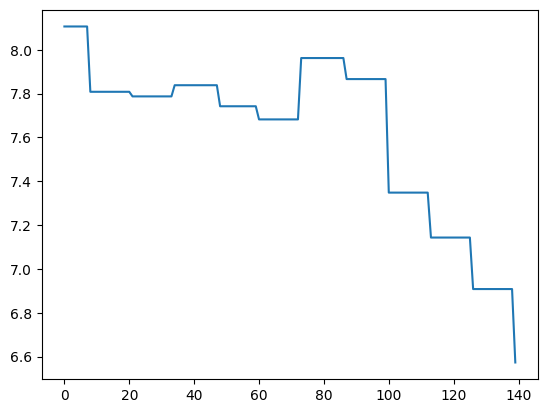

In [29]:
import matplotlib.pyplot as plt

plt.plot(data_x["Unemployment"].iloc[:140])

In [14]:
from sklearn.linear_model import LinearRegression